In [1]:
! which python

/Users/tontoman/opt/miniconda3/envs/i2m/bin/python


In [9]:
import numpy as np

import os

# image processing
from PIL import Image

# resample using nearest neighbour
import scipy.ndimage 

# viz
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
"""

    where am i?

"""

images_path = '../../data/images/'

print('\n')
print(f'images path: {images_path}')
print('\n')



images path: ../../data/images/




piña.jpg original size: (3024, 4032)


images to process: 1
images processed: 1




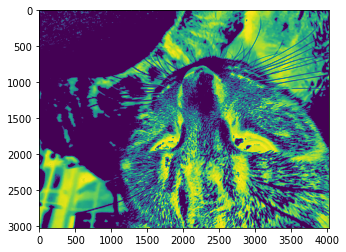

In [19]:
"""

    image spectogram
    
    https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv

"""


def load_image( image ):
    
    image_name = image.split("/")[-1]
    
    # global
    
    verbose = 1
    contrast = False
    highpass = True
    
    # load image object
    
    img = Image.open( image )
    img = img.convert("L")
    
    # transform image to array
    
    img_array = np.array(img)
    img_array = np.flip(img_array, axis=0)
    
    # mantain the original size
    
    if verbose:
        print(f'{image_name} original size: {img_array.shape}')
        
    # increase the constrast of the image
    
    if contrast:
        img_array = 1 / ( img_array + (10**15.2) ) # Now only god knows how this works but it does
    else:
        img_array = 1 - img_array
        
    # Scale between 0 and 1
    
    img_array -= np.min( img_array )
    img_array = img_array / np.max( img_array )
    
    # remove low pixel values (highpass filter)
    
    if highpass:
        
        highpass_filter = np.vectorize( lambda x: x if x > 0.5 else 0, otypes=[np.float] )
        img_array = highpass_filter( img_array )
            
    plt.imshow(img_array)
    
    return img_array
    
list_images = os.listdir( images_path )

dict_images = {}
for i in list_images:
    
    img_array = load_image( images_path + i )
    dict_images[ i.split('/')[-1] ] = img_array
    
print('\n')
print(f'images to process: {len(list_images)}')
print(f'images processed: {len(dict_images.keys())}')
print('\n')